# 01 Importing Libraries

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 02 Importing Dataframe

### Null hypothesis: population from 1990 to present does not show any upward trend over time and seasonality.

In [4]:
# Importing dataframe
path = r'C:\Users\vacgo\Documents\Achievement 6'
data = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Berlin pop 1950-2024.csv'), index_col = False)

In [5]:
data.head()

,Date,Population,Annual % Change
0,1950-12-31,3338000,NaN
1,1951-12-31,3330000,-0.24
2,1952-12-31,3322000,-0.24
3,1953-12-31,3314000,-0.24
4,1954-12-31,3306000,-0.24


In [6]:
data.shape

(86, 3)

In [7]:
data.columns

Index(['Date', ' Population', ' Annual % Change'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data = data.drop(columns=[' Annual % Change'])

In [10]:
data = data.rename(columns={' Population': 'population', 'Date': 'date'})

In [11]:
data.head()

,date,population
0,1950-12-31,3338000
1,1951-12-31,3330000
2,1952-12-31,3322000
3,1953-12-31,3314000
4,1954-12-31,3306000


In [12]:
# Convert 'Date' column to datetime
data['date'] = pd.to_datetime(data['date'])

In [13]:
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')

In [14]:
data = data.set_index('date') #Set the date to index

In [15]:
data = data.sort_index()

In [16]:
data.head()

,population
date,
1950-12-31,3338000
1951-12-31,3330000
1952-12-31,3322000
1953-12-31,3314000
1954-12-31,3306000


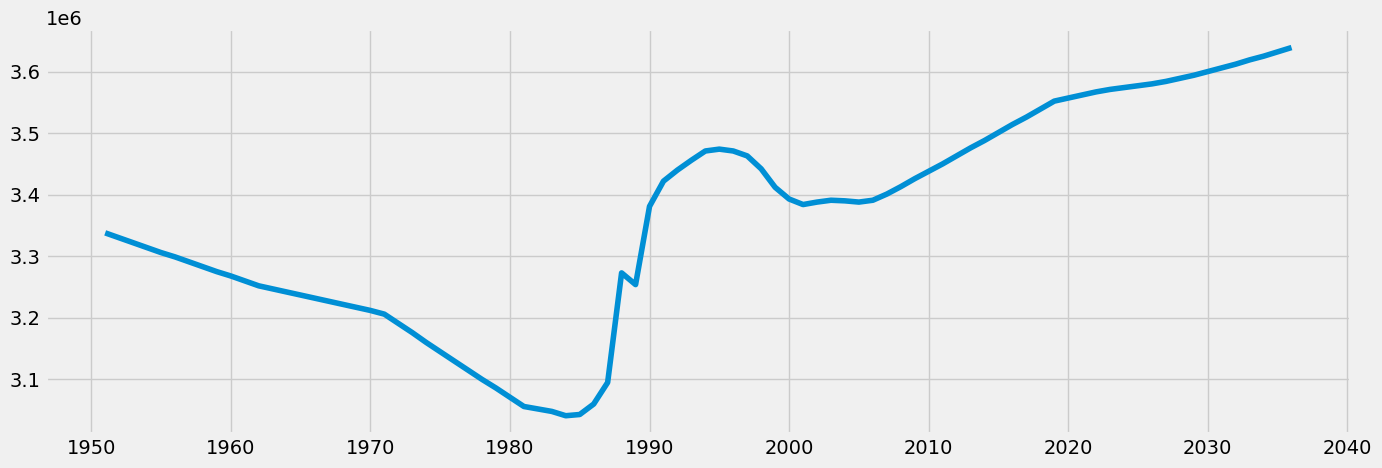

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [18]:
data.dtypes

population    int64
dtype: object

In [19]:
data['population'].describe()

count    8.600000e+01
mean     3.361721e+06
std      1.748144e+05
min      3.041000e+06
25%      3.233250e+06
50%      3.389000e+06
75%      3.497750e+06
max      3.639000e+06
Name: population, dtype: float64

# 03 Subsetting

In [21]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [22]:
data_2.head()

,date,population
0,1950-12-31,3338000
1,1951-12-31,3330000
2,1952-12-31,3322000
3,1953-12-31,3314000
4,1954-12-31,3306000


In [23]:
data_sub = data_2.loc[(data_2['date'] > '1990-01-01')]

## Only getting the population count from 1990 since before this time, Germany was divided into East and West, and therefore statistics may not be reliable before the unification of Germany.

In [25]:
data_sub.head()

,date,population
40,1990-12-31,3422000
41,1991-12-31,3440000
42,1992-12-31,3456000
43,1993-12-31,3471000
44,1994-12-31,3474000


In [26]:
data_sub.shape

(46, 2)

In [27]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,population
datetime,
1990-12-31,3422000
1991-12-31,3440000
1992-12-31,3456000
1993-12-31,3471000
1994-12-31,3474000


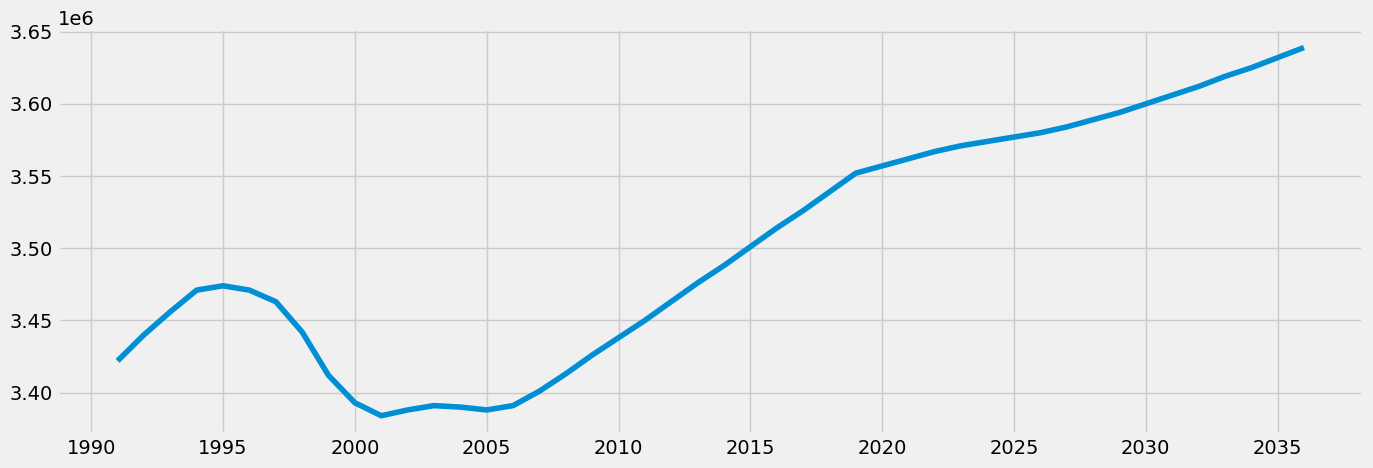

In [28]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub)

In [29]:
data_sub.isnull().sum()

population    0
dtype: int64

## Observation in population count: Population peaked until 1995 after reunification. From 1995 to early 2000s, there was a lot of migration from the former East Germany (that came to West Berlin) to the former West Germany states. So there was a lot of migration from Berlin to more stable and structured part of Germany that was formerly part of West Germany. Also data contains predicted population until 2035.

In [31]:
# Create a new DataFrame with the smoothened values -- NO NEED TO SMOOTH
#data_smooth = data_sub.copy()

In [32]:
# Apply a simple moving average with a window of 50 days
#data_smooth['value_smoothed'] = data_sub['population'].rolling(window=3, min_periods=1).mean()

In [33]:
# Plot the data using matplotlib.

#plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

#plt.plot(data_smooth)

In [34]:
#data_smooth.head()

In [35]:
#data_smooth_2 = data_smooth.drop(columns=['value'])

In [95]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=4)

In [97]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

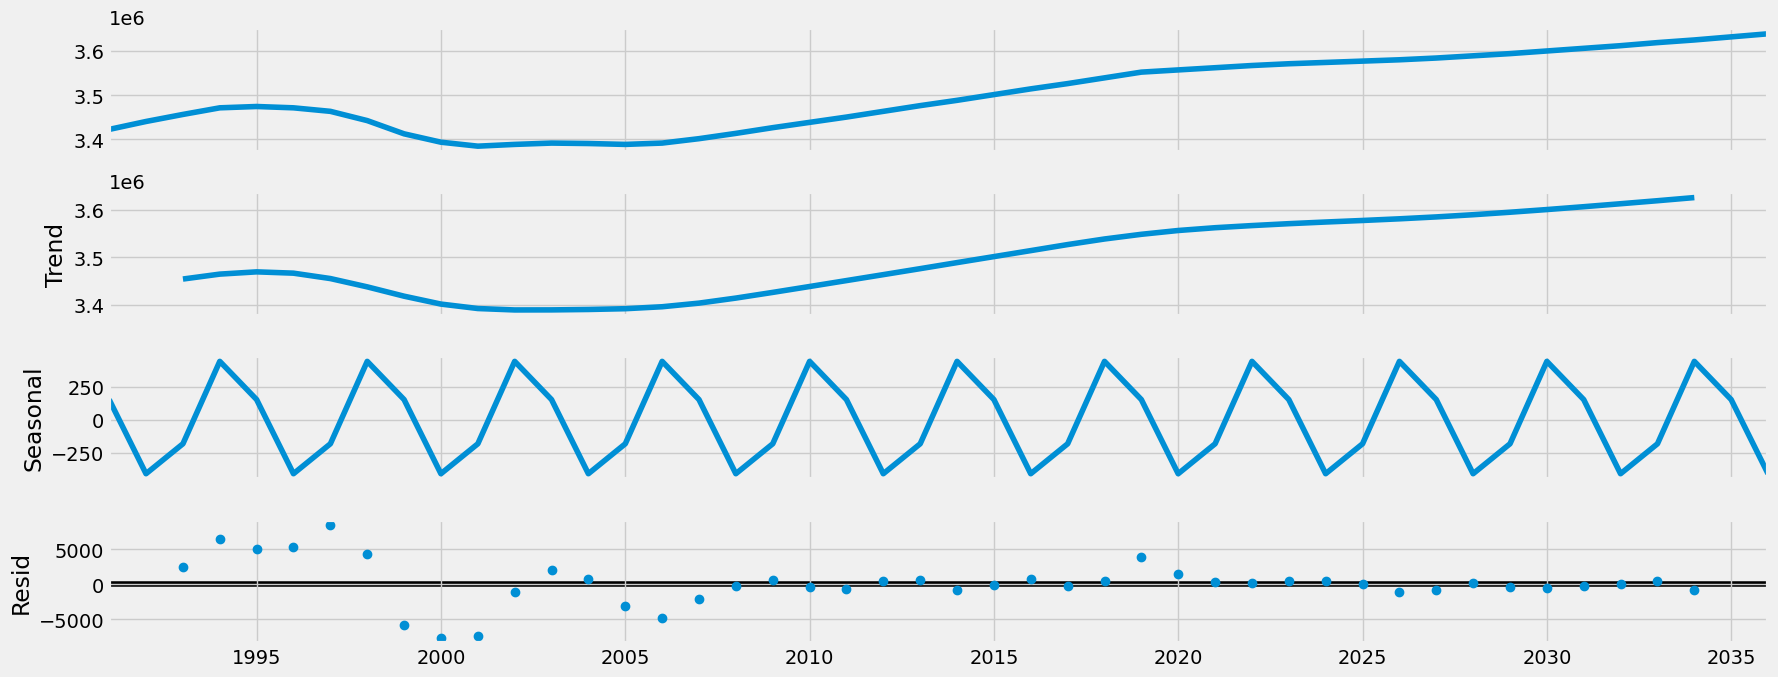

In [99]:
# Plot the separate components

decomposition.plot()
plt.show()

## Trend: 
#### The general trend of the population is trending upwards, as more and more people come into Berlin.

## Seasonal:
#### With the limited number of data points, we can still see seasonality, albeit very slightly in terms of population growth. As we can see there was a downward trend during the 1995 to 2005. There is also another population decline that is happening in the 2020s until forecasted before 2030, however i think this is not a decline, rather a decline in % growth but still growing overall.

## Residual:
#### we can see that there is a minimal residual data, that suggest the model captures the trend and seasonality.

# 04 Testing for Stationarity

In [101]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['population'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.197735
p-value                         0.938791
Number of Lags Used             4.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


### The test shows that the Test Statistics is higher than any of the critical values, and therefore I can't reject the null hypothesits.
### the p-value is also higher than the 0.005 threshold, meaning that the data is not stationary.

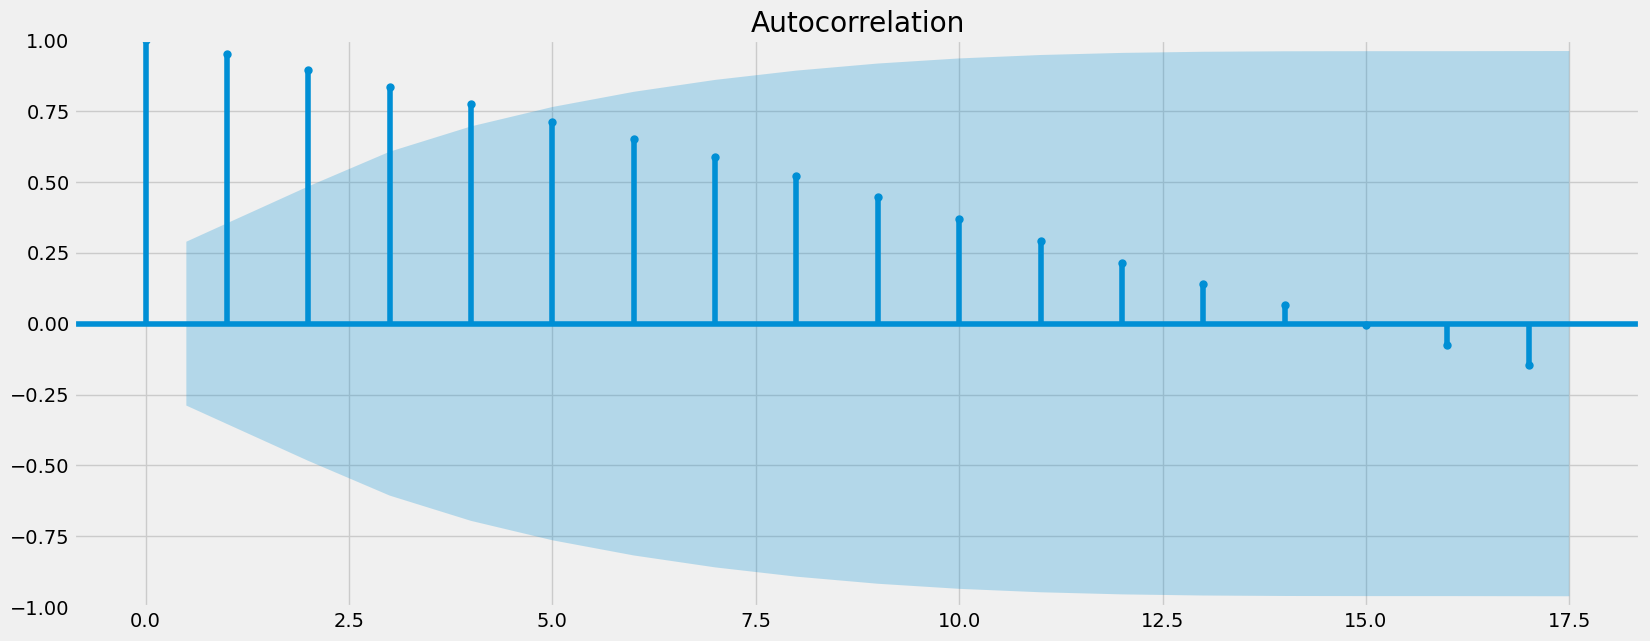

In [43]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

## Not stationary

# 05 Make data stationary

In [103]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [105]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [107]:
data_diff.head()

,population
datetime,
1991-12-31,18000.0
1992-12-31,16000.0
1993-12-31,15000.0
1994-12-31,3000.0
1995-12-31,-3000.0


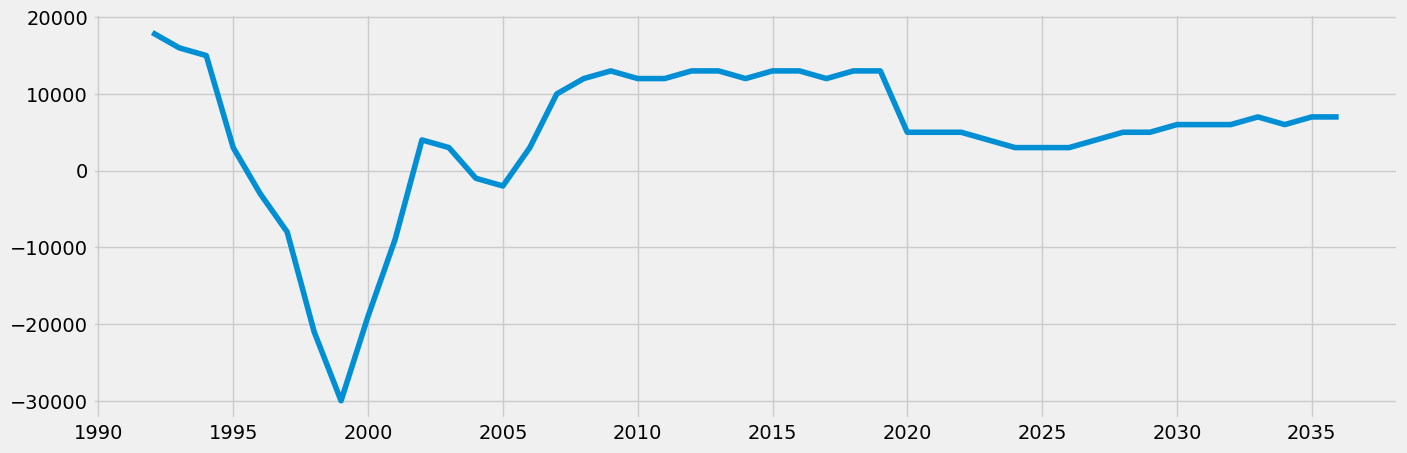

In [109]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [111]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.380939
p-value                         0.011626
Number of Lags Used            10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


### Test statistic is now lower than the critical values at 5% and 10%, but not at 1%. This can already be used to do forecasting
### p-value is lower than 0.05 which means that the data is now stationary.

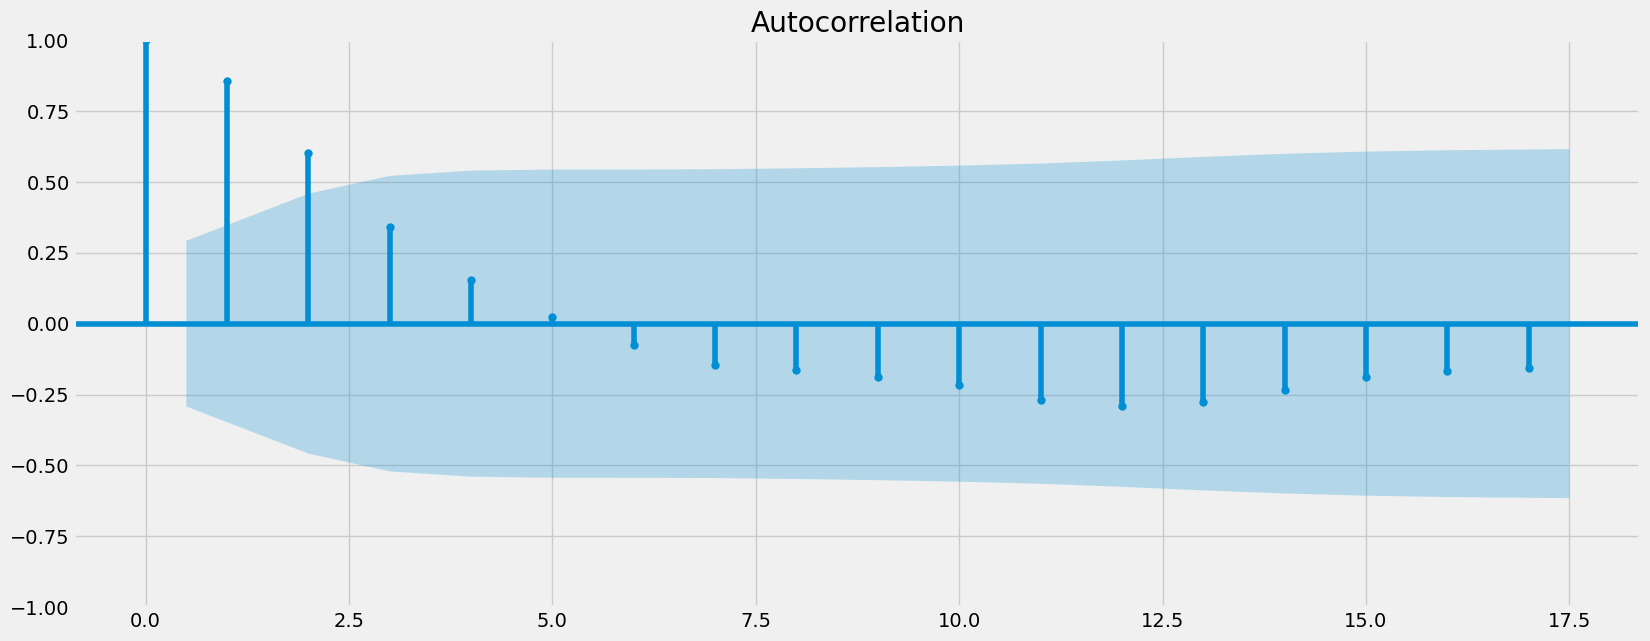

In [52]:
# Check out a plot of autocorrelations

plot_acf(data_diff)
plt.show()